# Scaling data 

## Objectives

- Understanding the effect of different scalers on the data.

- Using different scaler in sklearn.

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import statsmodels.api as sm
import pandas as pd

In [ ]:
df = pd.read_csv('../day-8-multiple-regression/data/Advertising.csv', index_col = 0)
df

In [ ]:
model = sm.OLS(df.Sales, sm.add_constant(df.drop(columns = 'Sales')))
results = model.fit()
results.summary()

In [ ]:
# Question: which of these coefficients is most important? 
# Radio cuz of high coef. but it's false assumption because we don't know what the x values are. 

In [ ]:
df = pd.read_csv('../day-8-multiple-regression/data/Advertising.csv', index_col = 0)
df['TV'] = df['TV']*1000

In [ ]:
df.head()

In [ ]:
model = sm.OLS(df.Sales, sm.add_constant(df.drop(columns = 'Sales')))
results = model.fit()
results.summary()

In [ ]:
# Without doing anything meaningful to the data, just by scaling TV, the coefficient has changed. 

In [ ]:
np.random.seed(seed=43)
X = np.random.multivariate_normal(mean=(1, 1),
                                  cov=[[1, 0.7], [0.7, 1]],
                                  size=200)

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Initial Distribitions of the Columns


In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('X1')
plt.hist(X[:, 0])

plt.subplot(1, 2, 2)
plt.title('X2')
plt.hist(X[:, 1])

plt.show()

## Scalers in Sklearn and their effect on the data

## Centralize

In [ ]:
# take all my X and centralize them around 0.
X_centralized = X - X.mean()

X[:10]
X_centralized[:10]

In [ ]:
plt.scatter(X_centralized[:,0], X_centralized[:,1])

plt.title('Centralizing the data')

plt.xlabel('x1_centralized')
plt.ylabel('x2_centralized')

plt.show()

## StandardScaler

[Sklearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [ ]:
# what the StandardScaler does:
(X_centralized/ X_centralized.std()).std()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standard_scaler = StandardScaler()

X_std_scaled = standard_scaler.fit_transform(X)

plt.scatter(X_std_scaled[:, 0], X_std_scaled[:, 1])

plt.title('Scaling with Standard Scaler')

plt.xlabel('x1_standardized')
plt.ylabel('x2_standardized')

plt.show()

In [ ]:
plt.figure(figsize= (10,6))
plt.subplot(1,2,1)
plt.title('X1')
plt.hist(X_std_scaled[:,0])

plt.subplot(1,2,2)
plt.title('X2')
plt.hist(X_std_scaled[:,1])

plt.show()

In [ ]:
# let's investigate columns separately

X1_std_scaled_mean = round(X_std_scaled[:, 0].mean(), 4)

X1_std_scaled_std = round(X_std_scaled[:, 0].std(), 4)

print(f'Mean of X1 after standard scaling is {X1_std_scaled_mean:.4f}')
print(f'Std of X1 after standard scaling is {X1_std_scaled_std:.4f}')

In [ ]:
# let's investigate columns separately

X2_std_scaled_mean = round(X_std_scaled[:, 1].mean(), 4)

X2_std_scaled_std = round(X_std_scaled[:, 1].std(), 4)

print(f'Mean of X2 after standard scaling is {X2_std_scaled_mean:.4f}')
print(f'Std of X2 after standard scaling is {X2_std_scaled_std:.4f}')

In [ ]:
# Let's do this with advertising data.

In [ ]:
df.head()

In [ ]:
y = df.Sales
X = df.drop(columns = 'Sales')
X.head()

In [ ]:
X-X.mean()

In [ ]:
(X-X.mean()).TV.mean()

In [ ]:
# every mean is zero
(X-X.mean()).mean()

In [ ]:
X_std = (X-X.mean())/X.std()

In [ ]:
model = sm.OLS(y, sm.add_constant(X_std))
results = model.fit()
results.summary()

In [ ]:
# here we see TV's impact is actually more important than radio

In [ ]:
# this time with sklearn

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()


In [ ]:
ss.fit(X)
X_ss  = ss.transform(X)
# same thing as 
X_ss = ss.fit_transform(X)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [41]:
lm.fit(X_ss,y)
print(lm.coef_,lm.intercept_)

[ 3.91925365  2.79206274 -0.02253861] 14.022500000000003


In [58]:
ss.inverse_transform([.5,3,0])

array([1.89862166e+05, 6.76929369e+01, 3.05540000e+01])

Note that standard scaler does __not__ necessarily makes data __normal__

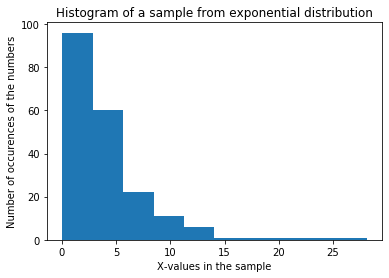

In [42]:
exponential_data = np.random.exponential(scale=4, size=200)

plt.hist(exponential_data)
plt.title('Histogram of a sample from exponential distribution')
plt.xlabel('X-values in the sample')
plt.ylabel('Number of occurences of the numbers')
plt.show()

In [43]:
# let's mean and std seperately

exponential_mean = round(exponential_data.mean(), 4)

exponential_std = round(exponential_data.std(), 4)

print(f'Mean of exponential_data is {exponential_mean:.4f}')
print(f'Std of exponential_data is {exponential_std:.4f}')

Mean of exponential_data is 4.0656
Std of exponential_data is 4.1547


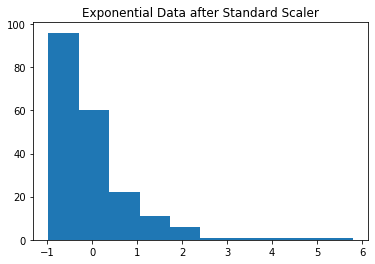

In [45]:
## After Standard Scaler
# now data is more skewed on the right hand side

std_scaled_exponential = standard_scaler.fit_transform(exponential_data.reshape(-1,1))

plt.hist(std_scaled_exponential)
plt.title('Exponential Data after Standard Scaler')

plt.show()

In [46]:
# let's mean and std seperately

std_exponential_mean = round(std_scaled_exponential.mean(), 4)

std_exponential_std = round(std_scaled_exponential.std(), 4)

print(f'Mean of exponential_data after scaling is {std_exponential_mean:.4f}')
print(f'Std of exponential_data after scaling is {std_exponential_std:.4f}')

Mean of exponential_data after scaling is 0.0000
Std of exponential_data after scaling is 1.0000


## MinMax Scaler


[Sklearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)

__Your Turn__

- Apply minmax scaler to the data and plot it.

- Check the mean and std of individual columns


In [47]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [48]:
np.random.seed(seed=43)
X = np.random.multivariate_normal(mean=(1, 1),
                                  cov=[[1, 0.7], [0.7, 1]],
                                  size=200)

In [49]:
X_minmax = mms.fit_transform(X)

In [52]:
X[:10]

array([[ 1.11454234,  0.41083565],
       [ 1.55613454,  1.1417907 ],
       [ 0.36885354,  0.04893739],
       [-0.237854  ,  1.31923964],
       [ 0.00580637, -0.334408  ],
       [ 1.14305541,  1.4957445 ],
       [ 2.87231528,  2.20454672],
       [ 0.59370502,  0.49741228],
       [-0.54458569, -1.02362931],
       [ 2.30968527,  1.62059045]])

In [51]:
X_minmax[:10]

array([[0.49637674, 0.42878688],
       [0.5668114 , 0.5671145 ],
       [0.37743819, 0.36030042],
       [0.28066736, 0.60069534],
       [0.31953158, 0.28775526],
       [0.50092462, 0.63409753],
       [0.77674433, 0.76823289],
       [0.41330236, 0.44517084],
       [0.23174317, 0.15732543],
       [0.68700395, 0.65772366]])

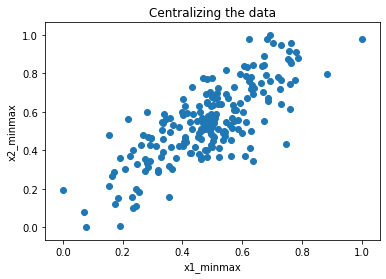

In [53]:
plt.scatter(X_minmax[:,0], X_minmax[:,1])

plt.title('Centralizing the data')

plt.xlabel('x1_minmax')
plt.ylabel('x2_minmax')

plt.show()

In [57]:
X_minmax.mean(axis = 0)

array([0.48249926, 0.54806164])

In [55]:
X_minmax.std(axis = 0)

array([0.16666838, 0.19918957])

## Bonus: Normalizer

[Sklearn Documentation](https://scikit-learn.org/stable/modules/preprocessing.html#normalization)

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
normalizer = Normalizer()

X_normalized = normalizer.fit_transform(X.T).T

In [ ]:
plt.scatter(X_normalized[:,0], X_normalized[:,1])

plt.title('Scaling with Normalizer')

plt.xlabel('X1_norm')
plt.ylabel('X2_norm')

plt.show()

In [ ]:
X_normalized[:,0].mean()

In [ ]:
X_normalized[:,0].std()